In [2]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('per capita energy use.csv')

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world.columns = ['pop_est', 'continent', 'name', 'Code', 'gdp_md_est', 'geometry']

merge1 = pd.merge(df, world, on='Code')
merge1.drop(['continent', 'name', 'gdp_md_est', 'pop_est'], axis=1, inplace=True, errors='ignore')
result1 = merge1[merge1['Year'] == 2019]

merge = pd.merge(world, df, on='Code')
merge.drop(['continent', 'name', 'gdp_md_est', 'Code'], axis=1, inplace=True, errors='ignore')
result = merge[merge['Year'] == 2019]

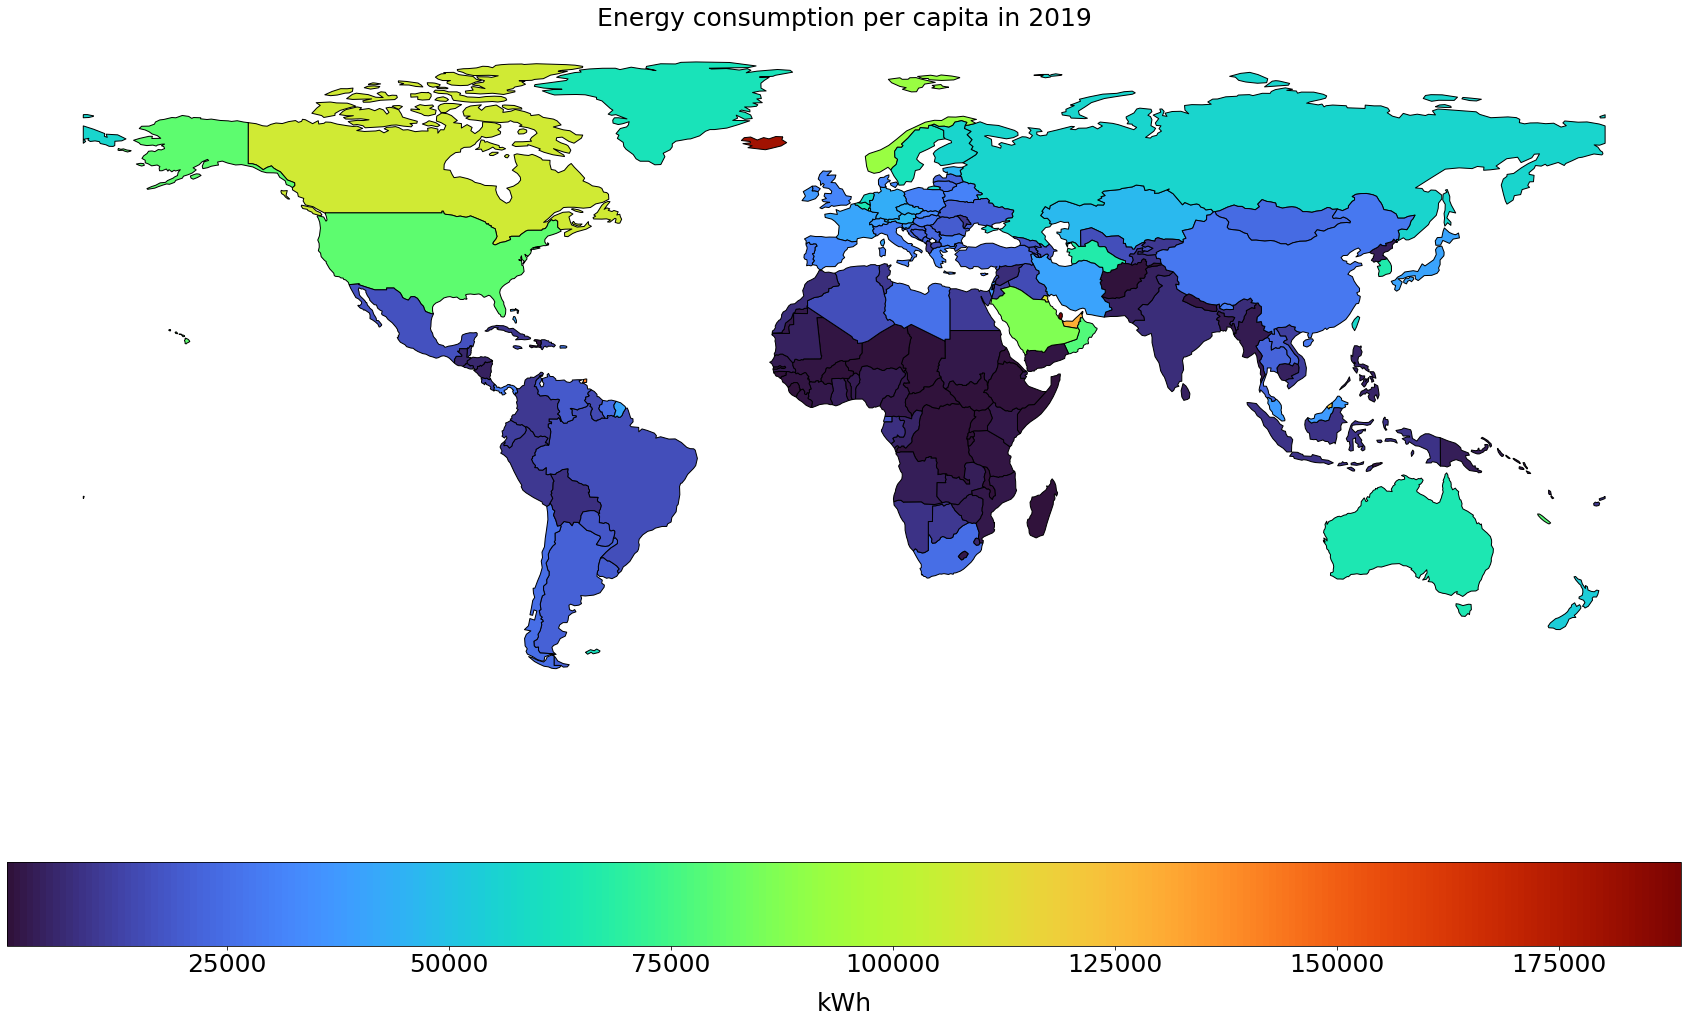

In [3]:
fig, axis = plt.subplots(1, figsize=(30,20))
result.plot(ax=axis, column='Energy per capita (kWh)', legend=True, 
            legend_kwds={'orientation': "horizontal"}, 
            cmap='turbo', edgecolor='black')
plt.title("Energy consumption per capita in 2019", fontsize=25)
axis.set_axis_off();

fig = axis.figure
cb = fig.axes[1]
cb.tick_params(labelsize=25)
cb.set_xlabel("kWh", fontsize=25, labelpad=15)

plt.savefig('World primary energy consumption per capita in 2019.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
bar = result1.drop(['pop_est', 'geometry', 'Year'], axis=1, errors='ignore')
ordered = bar.sort_values(by=['Energy per capita (kWh)'], ascending=False)
final = ordered.head(70)

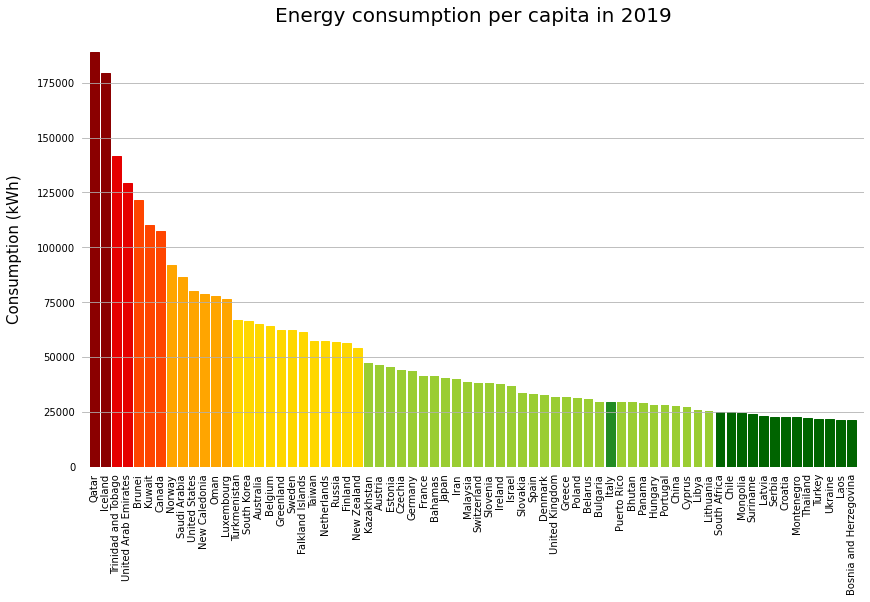

In [6]:
plt.figure(figsize=(14,8))
plt.title("Energy consumption per capita in 2019", fontsize=20, pad=10)

graph = plt.bar(final['Entity'], final['Energy per capita (kWh)'], color='yellowgreen')
for count in range(0, 2):
    graph[count].set_color('darkred')#darkred, E50000, orangered, darkorange, FFD700
for count in range(2, 4):    
    graph[count].set_color('#E50000')
for count in range(4, 7):
    graph[count].set_color('orangered')
for count in range(7, 13):
    graph[count].set_color('orange')
for count in range(13, 25):
    graph[count].set_color('#FFD700')
graph[47].set_color('forestgreen')
for count in range(57, 70):
    graph[count].set_color('darkgreen')

plt.margins(x=0.01)
plt.box(on=None)

plt.ylabel("Consumption (kWh)", fontsize=15, labelpad=15)
plt.tick_params(bottom=False, left=False)
plt.gca().yaxis.grid()
plt.xticks(rotation='vertical')

plt.savefig('Total global energy consumption per capita in 2019.jpg', dpi=300, bbox_inches = 'tight')
plt.show()